## Introduction

### WeRateDogs Twitter Data Analysis : A Data Wrangling Project
### by Igwe Emmanuel

### Project Context

### Project goal: 
WeRateDogs Twitter data can be manipulated to produce insightful and reliable analysis and visualizations. The Twitter archive is fantastic, but it only includes the most fundamental tweet details. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### Dataset Description
In this project, I will work on the following three datasets.

### Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, it was filtered for tweets with ratings only (there are 2356). This data was extracted programmatically, but didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. Further assessing and cleaning would be done on these columns before using them for analysis and visualization.

### Additional Data via the Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. Since WeRateDogs Twitter archive has been provided and specifically the tweet IDs within it, can gather this data for all 5000+.

### Image Predictions File
One more cool thing: Every image in the WeRateDogs Twitter archive were run through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Definition for the predictions columns

p1 is the algorithm's #1 prediction for the image in the tweet
p1_conf is how confident the algorithm is in its #1 prediction
p1_dog is whether or not the #1 prediction is a breed of dog
p2 is the algorithm's second most likely prediction
p2_conf is how confident the algorithm is in its #2 prediction
p2_dog is whether or not the #2 prediction is a breed of dog etc.
This Project Analysis would be done using Python withe the aid of some of its packages, which would be imported

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from tweepy import OAuthHandler
import json
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")





# Data Gathering 

### 1. Read data in twitter-archive-enhanced using read_csv

In [4]:
# Reading WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) to a dataframe

df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Checking to see if it was correctly done

df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2. Using Requests Library to download Tweet Image Prediction data


In [6]:
# Storing url in a variable

In [3]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [7]:
# Opening the file

In [4]:
r =  requests.get(url, allow_redirects = True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [8]:
# Reading the file into a dataframe using pandas read_csv

In [27]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
# Checking first two rows to see if it was correctly done

In [44]:

df_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 3.  Gathering additional data via Twitter API using Tweepy Library

In [34]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'



In [10]:
# Importing packages

In [197]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [11]:
# declearing and assigning tweet_ids to df.tweet_id.values

In [37]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)


2356

In [13]:
# checking the tweet id

In [38]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [196]:

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0

# creating an error dictionary to catch errors that might occur
error_dict = {}
start_time = time.time()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet1_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            # Getting the status id of each tweet id
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # Converting each tweet status to a JSON object/string and saving to a file
            json.dump(tweet._json, file)
            file.write('\n')
        # Catching errors that occured 
        except tweepy.TweepError as error:
            print("Error")
            # Appending errors to error_dict
            error_dict[tweet_id] = error
            pass
end_time = time.time()
print(end_time - start_time)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [30]:
               
# Creating an empty list
df3_tweets_list = []
file_name = 'tweet_json.txt'
# Opening and Reading text file
with open(file_name, 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        # Getting the requred columns
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
         # Appending each to the list
        df3_tweets_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})

    

In [14]:
# converting to pandas dataframe

In [31]:
df_3 = pd.DataFrame(df3_tweets_list, columns=["tweet_id",'retweet_count', 'favorite_count'])

In [15]:
# Checking to see if it was correctly done

In [9]:
df_3.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5301,29330


# Data Assessing 

### Assessing df1 (Twitter Archive Data)
### Twitter Archive Data- df1 Column Description

#### Here's a brief decription of column headers

. tweet_id - unique id for each tweet by the twitter account @DogRates

.in_reply_to_status_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

.in_reply_to_user_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.

.timestamp - The time the tweet was tweeted

.source - The source of the tweet

.text - This is the content of the tweet

.retweeted_status_id - This attribute contains a representation of the original Tweet that was retweeted.

.retweeted_status_user_id - The id of the retweeted status user

.retweeted_status_timestamp - This attribute contains a representation of the time the original Tweet was retweeted.

.expanded_urls - This is the url of the tweet( can be used to access the tweet directly)

.rating_numerator - This is the numerator of the ratings for the dog

.rating_denominator - his is the denominator of the ratings for the dog(should always be 10)

.name - This is the name of the dog

.doggo - This is one of the dog stages

.floofer - This is one of the dog stages

.pupper - This is one of the dog stages

.puppo - This is one of the dog stages

(some of the descriptions were gotten from twitter, others by me from the project motivation)

In [17]:
# assessing the head of df 1

In [10]:
df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [18]:
# asscessing the head of df 2

In [11]:
df_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [19]:
# accessing the head of df 1 with the info()

In [59]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# accsessing the df 2 dataframe with the info()

In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# accessing the df_3 dataframe with the info()

In [61]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2324 non-null   int64
 1   retweet_count   2324 non-null   int64
 2   favorite_count  2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [14]:
# checking for duplicated columns

all_columns = pd.Series(list(df_3) + list(df_2) + list(df_1))
all_columns[all_columns.duplicated()]

3     tweet_id
15    tweet_id
dtype: object

In [136]:
# accessing df_1

In [63]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
# accessing the df 2 dataframe with describe()

In [64]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# accessing the df 3 dataframe with describe()

In [65]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.324000e+03,2324.000000,2324.000000
mean,7.418527e+17,2473.524957,7060.407917
std,6.823001e+16,4186.940687,10967.763219
min,6.660209e+17,1.000000,0.000000
25%,6.780228e+17,494.750000,1226.000000
50%,7.182408e+17,1154.500000,3051.000000
75%,7.986673e+17,2862.750000,8622.250000
max,8.924206e+17,70734.000000,144877.000000


# Data Cleaning



In [ ]:
# taking note of quality and tidiness issues

## Tidiness issues

### tidiness issues

1. the dog stages doggo, floofer , pupper and puppo in df_1  should be in a column
2. Twitter archive data (df_1), image Predictions data(df_2), and Tweets data (df_3) should be combined as one




### quality issues




1. extract the text from the anchor in the source column in df_1 
2. 
  - Dropping Rows where Retweet_id is not null (reason: I need Tweets and not Retweets for my analysis)
  - Dropping rows where rating_denominator not equal to 10 
  - Remove rows where dog name is in lower case (fake names)
  - Drop column image_num img_num in image predictions dataframe(df_2_clean) because I won't be using it for analysis


3. Drop column image number retweeted_status_id, retweeted_status_timestamp,in_reply_to_status_id in df_1_clean because I won't be using it for analysis
4. Drop column in_reply_to_user_id in df1_clean because I won't be using it for analysis
5. replacing rows in dog_stages that have value 'in_reply_to_user_id ' or 'retweeted_status_user_id' with empty string
6. Convert timestamp to datetime
7. The Name column has inaccurate dog names and I have been able to list them out and would change them accordingly
8. In the name column, "None" was used to represent records for Dogs without Names. This should be represent with Nan

In [24]:
# making copy of my datasets df1, df 2, df3

In [64]:
df1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()


In [25]:
# accessing the df1 clean with sample()

In [69]:
df1_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
958,751456908746354688,NaN,NaN,2016-07-08 16:44:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper that's very hungry but too laz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751456908...,12,10,None,None,None,pupper,None


## Tidiness issue #1

### Define

2. reshaping df_1_clean... putting the dog stages doggo, floofer , pupper and puppo in a column using melt function

### code

In [43]:
# reshaping df_1_clean... putting the dog stages doggo, floofer , pupper and puppo in a column using melt function

In [65]:
df1_clean = pd.melt(df1_clean, id_vars=['tweet_id','in_reply_to_status_id','timestamp','source','text','retweeted_status_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'], 
                 var_name="dog_stages", value_name="dog_stages_name")


### test

In [44]:
# checking to see if df_1_clean have been reshaped.

In [74]:
df1_clean.sample(2)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_stages_name
2239,667937095915278337,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,in_reply_to_user_id,NaN
8913,675845657354215424,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,floofer,None


## quality  issue #1

### Define

extract the text from the anchor in the source column in df_1

### code

In [75]:
# Getting the unique values in source column
df1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     13326
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          546
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       198
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       66
Name: source, dtype: int64

In [111]:
# Replacing the source with only the text component
df1_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
df1_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
df1_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
df1_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

### test

In [45]:
# checking if the text have been extracted from the anchor

In [112]:
df1_clean.source.value_counts()

Twitter for iPhone     13326
Vine - Make a Scene      546
Twitter Web Client       198
TweetDeck                 66
Name: source, dtype: int64

In [46]:
# checking if the text have been extracted from the anchor

In [104]:
df1_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_stages_name
1016,746906459439529985,2016-06-26 03:22:31 +0000,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,,4196983835.0


## quality  issue #2

### Define

 - Dropping Rows where Retweet_id is not null (reason: I need Tweets and not Retweets for my analysis)
 - Dropping rows where rating_denominator not equal to 10 
 - Remove rows where dog name is in lower case (fake names)
 - Drop column image_num img_num in image predictions dataframe(df_2_clean) because I won't be using it for analysis

### code

In [79]:
# Filter to get only rows where retweets is empty
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]

In [34]:
# getting the number of rating_denominator not equal to 10 

In [82]:
# Getting the count of rows where denominator is not equal to 10
len(df1_clean.rating_denominator[df1_clean.rating_denominator != 10])

132

In [33]:
#  Dropping rows where rating_denominator not equal to 10 

In [83]:
# Filter to get only rows where rating_denominator is equal to 10
df1_clean= df1_clean[df1_clean['rating_denominator'] == 10]

In [37]:
# using Regex(Regular expressions) to get the list of all names that are not uppercase 

In [85]:
# Using Regex(Regular expressions) to get the list of all names that are not uppercase 
lowercase_names = df1_clean.name.str.contains('^[a-z]', regex = True)
df1_clean[lowercase_names].name.value_counts().sort_index()

a               324
actually         12
all               6
an               30
by                6
getting          12
his               6
incredibly        6
infuriating       6
just             18
life              6
light             6
mad               6
my                6
not              12
officially        6
old               6
one              24
quite            18
space             6
such              6
the              48
unacceptable      6
very             24
Name: name, dtype: int64

In [40]:
# Filter out rows where name contains with lower case letter

In [86]:
# Filter out rows where name contains with lower case letter
df1_clean = df1_clean[df1_clean['name'].str.contains('^[A-Z]+')]

In [ ]:
# Drop column image_num img_num in image predictions dataframe(df_2_clean) because I won't be using it for analysis

In [65]:
df_2_clean.drop('img_num', axis=1, inplace=True)

### test

In [35]:
# checking if we still have retweet rows left

In [80]:
df1_clean.retweeted_status_id.notnull().sum()

0

In [36]:
# checking if we still have rows where rate denominator is not equal 10

In [84]:
len(df1_clean.rating_denominator[df1_clean.rating_denominator != 10])

0

In [39]:
# checking if we still have rows where name contains lower case letter

In [195]:
len(df1_clean[lowercase_names].name)

0

In [42]:
 # checking if column image_num img_num in image predictions dataframe(df_2_clean) have been dropped

In [93]:
df1_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_stages_name
3581,714141408463036416,2016-03-27 17:25:54 +0000,Twitter for iPhone,"I know we only rate dogs, but since it's Easte...",https://twitter.com/dog_rates/status/714141408...,10,10,None,retweeted_status_user_id,NaN


## quality issue #3

### Define

Drop column image number retweeted_status_id,	retweeted_status_timestamp,in_reply_to_status_id in df_1_clean because I won't be using it for analysis

### code

In [48]:
# Drop column  retweeted_status_id, retweeted_status_timestamp,in_reply_to_status_id in df_1_clean

In [69]:
df1_clean.drop(['retweeted_status_id','retweeted_status_timestamp','in_reply_to_status_id'], axis=1, inplace=True)

### test

In [57]:
# checking if column  retweeted_status_id, retweeted_status_timestamp have been dropped

In [49]:
df1_clean.columns

Index(['tweet_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## quality issue #4

### Define

 Drop column in_reply_to_user_id in df1_clean because I won't be using it for analysis

### code

In [70]:
df1_clean.drop(['in_reply_to_user_id'], axis=1, inplace=True)

KeyError: "['in_reply_to_user_id'] not found in axis"

### test

In [61]:
# checking if column in_reply_to_user_id have been dropped

In [71]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'dog_stages_name'],
      dtype='object')

## quality issue #5

### Define

replacing rows in dog_stages that have value 'in_reply_to_user_id '  or 'retweeted_status_user_id' with empty string

In [75]:
# checking content different dog stages

In [72]:
df1_clean.dog_stages.value_counts()

in_reply_to_user_id         2356
retweeted_status_user_id    2356
doggo                       2356
floofer                     2356
pupper                      2356
puppo                       2356
Name: dog_stages, dtype: int64

### code

In [76]:
# replacing the content different dog stages that have 'in_reply_to_user_id'and'retweeted_status_user_id'to ''

In [99]:
df1_clean.dog_stages.replace('in_reply_to_user_id', '', inplace=True)

In [101]:
df1_clean.dog_stages.replace('retweeted_status_user_id', '', inplace=True)

### test

In [77]:
# checking content different dog stages if changes have been effected

In [103]:
df1_clean.dog_stages.value_counts()

           4104
doggo      2052
floofer    2052
pupper     2052
puppo      2052
Name: dog_stages, dtype: int64

## Tidiness issue #2

### Define

Merging Twitter archive data(df1_clean), Image Predictions(df_2_clean), and Tweet data (df_3_clean)

### code

In [113]:
df1_clean.shape

(14136, 10)

In [79]:
df_2_clean.shape

(2075, 12)

In [80]:
df_3_clean.shape

(2324, 3)

In [114]:
# merge inner to get only tweets that appear in both dataframe
df_merged =df_2_clean.merge(df_3_clean, how='inner', on='tweet_id')

In [115]:
df_merged2 =df_merged.merge(df1_clean, how='inner', on='tweet_id')

In [116]:
df_merged2.shape

(12330, 23)

### test

In [117]:
df_merged2.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_stages_name
2990,675820929667219457,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,1,basset,0.556373,True,beagle,0.201675,True,bloodhound,...,955,2015-12-12 23:34:00 +0000,Twitter for iPhone,Here's a handful of sleepy puppers. All look u...,https://twitter.com/dog_rates/status/675820929...,11,10,None,doggo,None
6305,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,...,4011,2016-03-27 17:25:54 +0000,Twitter for iPhone,"I know we only rate dogs, but since it's Easte...",https://twitter.com/dog_rates/status/714141408...,10,10,None,puppo,None


In [85]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            12330 non-null  int64  
 1   jpg_url             12330 non-null  object 
 2   img_num             12330 non-null  int64  
 3   p1                  12330 non-null  object 
 4   p1_conf             12330 non-null  float64
 5   p1_dog              12330 non-null  bool   
 6   p2                  12330 non-null  object 
 7   p2_conf             12330 non-null  float64
 8   p2_dog              12330 non-null  bool   
 9   p3                  12330 non-null  object 
 10  p3_conf             12330 non-null  float64
 11  p3_dog              12330 non-null  bool   
 12  retweet_count       12330 non-null  int64  
 13  favorite_count      12330 non-null  int64  
 14  timestamp           12330 non-null  object 
 15  source              12330 non-null  object 
 16  text

In [53]:
# checking for duplicates

In [115]:
sum(df_merged2.duplicated())

1849

In [55]:
# dropping duplicates in df_merge2

In [116]:
df_merged2.drop_duplicates(inplace=True)

In [56]:
# checking if we still have duplicates

In [118]:
sum(df_merged2.duplicated())

0

In [120]:
df_merged2.shape

(9377, 23)

In [50]:
# checking for rows with missing values and dropping them

In [122]:
df_merged2.isna().any(axis=1).sum()

1871

In [51]:
# dropping rows with missing values and dropping them

In [123]:
df_merged2.dropna(inplace=True)

In [52]:
#checking if we still have rows with missing values 

In [124]:
df_merged2.isnull().sum().any()

False

In [125]:
df_merged2.shape

(7506, 23)

## quality issue #6

### Define

Convert timestamp to datetime

### code

In [ ]:
# ascessing the df_merge dataframe.. the timestamp is currently an object

In [126]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2 to 11225
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7506 non-null   int64  
 1   jpg_url             7506 non-null   object 
 2   img_num             7506 non-null   int64  
 3   p1                  7506 non-null   object 
 4   p1_conf             7506 non-null   float64
 5   p1_dog              7506 non-null   bool   
 6   p2                  7506 non-null   object 
 7   p2_conf             7506 non-null   float64
 8   p2_dog              7506 non-null   bool   
 9   p3                  7506 non-null   object 
 10  p3_conf             7506 non-null   float64
 11  p3_dog              7506 non-null   bool   
 12  retweet_count       7506 non-null   int64  
 13  favorite_count      7506 non-null   int64  
 14  timestamp           7506 non-null   object 
 15  source              7506 non-null   object 
 16  text 

In [86]:
# converting the timestamp to timestamp format

In [127]:
df_merged2.timestamp = pd.to_datetime(df_merged2.timestamp)

### test

In [87]:
# checking if convertion was done correctly

In [128]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2 to 11225
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            7506 non-null   int64              
 1   jpg_url             7506 non-null   object             
 2   img_num             7506 non-null   int64              
 3   p1                  7506 non-null   object             
 4   p1_conf             7506 non-null   float64            
 5   p1_dog              7506 non-null   bool               
 6   p2                  7506 non-null   object             
 7   p2_conf             7506 non-null   float64            
 8   p2_dog              7506 non-null   bool               
 9   p3                  7506 non-null   object             
 10  p3_conf             7506 non-null   float64            
 11  p3_dog              7506 non-null   bool               
 12  retweet_count       7506 non-null

In [88]:
df_merged2.name.value_counts()

None      3420
a          330
Cooper      60
Oliver      60
Tucker      60
          ... 
Ricky        6
Fynn         6
Durg         6
Covach       6
Tilly        6
Name: name, Length: 934, dtype: int64

## quality issue #7¶

### Define

The Name column  in df_merge2 has inaccurate dog names and I have been able to list them out and would change them accordingly

### code

In [89]:
# to look at the liat of unique names of the dog
df_merged2.name.unique()

array(['None', 'a', 'an', 'the', 'quite', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Christoper', 'Lugan', 'Josep', 'Jockson', 'Jeph',
       'Carll', 'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy',
       'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Joshwa',
       'Genevieve', 'Fwed', 'Biden', 'Cupcake', 'Reese', 'Philippe',
       'Hall', 'Dook', 'Naphaniel', 'Frank', 'Kial', 'George', 'Olive',
       'Calvin', 'Filup', 'Shaggy', 'Tedrick', 'Stu', 'Erik',
       'Cleopatricia', 'Otis', 'Jiminy', 'Alfie', 'Skittles', 'Ron',
       'Torque', 'Bisquick', 'Jareld', 'Sophie', 'Rusty', 'DayZ', 'Jo',
       'Gòrdón', 'Spark', 'Marvin', 'Kallie', 'Jomathan', 'Maks',
       'Timofy', 'Zeek', 'Hanz', 'Winifred', 'Kevon', 'Banditt', 'Bobb',
       'Amélie', 'Ruffles', 'Lambeau', 'Herald', 'Jaycob', 'Jeremy',
       'Chaz', 'Ruby', 'Bernie', 'Harrison', 'Terrance', 'Tucker',
       'Samsom', 'Jaspers', 'Clarq', 'Ralf', 'Kirk', 'Sully', 'Tessa',
       'Dug', 'Saydee', 'Ch

In [ ]:
# After observing all the incorrect names, I was able to spot some names that were wrongly inputted

In [92]:
# the list containing the inaccurate names 
wrong_names = ['O', 'his', 'my', 'space', 'a', 'an', 'not', 'very', 'just', 'all', 'by', 'the', 'this', ]

In [93]:
# to confirm the elements of the list are present in the name column
df_merged2.name[df_merged2.name.isin(wrong_names)].unique()

array(['a', 'an', 'the', 'space', 'just', 'by', 'very', 'all', 'this',
       'his', 'not', 'my', 'O'], dtype=object)

Further Investigation was done to confirm the actual names and also confirm the rows which do not contain dog names then I discovered that

- the name 'O' is for the name "O'Malley"
- the name 'his' is for the name "Quinzo"
- the name 'my' is for the name "Zoey"
- the name 'space' is for the name "space pup"
- the remaining names are meant to be "None" because it does not contain names

In [94]:
# the code to replace the wrong names with the correct replacement
for name in wrong_names:
    if name == 'O':
        df_merged2.name.replace(name, "O'Malley", inplace = True)
    elif name == 'his':
        df_merged2.name.replace(name, "Quinzo", inplace = True)
    elif name == 'my':
        df_merged2.name.replace(name, "Zoey", inplace = True)
    elif name == 'space':
        df_merged2.name.replace(name, "space pup", inplace = True)
    else:
        df_merged2.name.replace(name, "None", inplace = True)

I then used programmatic assessment to check for incorrect names and noticed a pattern for other wrong names

In [95]:
df_merged2['wrong_names'] = df_merged2['name'].str.extract(pat='(^[a-z]+)')
more_wrong_names = df_merged2['wrong_names'].unique()

In [96]:
# to replace the newly found wrong names 
for name in more_wrong_names:
    df_merged2.name.replace(name, "None", inplace = True)

In [98]:
# to drop the newly created column
df_merged2.drop("wrong_names", axis = 1, inplace = True)

### test

In [99]:
# to confirm if the changes were made
for name in wrong_names:
    assert name not in df_merged2.name.values

## quality issue #8¶

### Define

In the name column, "None" was used to represent records for Dogs without Names. This should be represent with Nan

### code

In [101]:
# to change None" dog names to Nan
df_merged2.name.replace('None', np.nan, inplace = True)

### test

In [102]:
# to confirm that the changes have been made
assert "None" not in df_merged2.name.values

In [104]:
for name in more_wrong_names:
    assert name not in df_merged2.name.values

### Storing to a csv file

In [119]:
# storing in a csv file called twitter_archive_master.csv
df_merged2.to_csv("twitter_archive_master.csv", index=False)

# Data Analyzing and Visualization 


In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

In [120]:
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [106]:
df_twitter_archive_master.shape

(12330, 23)

In [121]:
df_twitter_archive_master.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_stages_name
3306,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,...,2223,2015-12-17 18:34:46 +0000,Twitter for iPhone,Reckless pupper here. Not even looking at road...,https://twitter.com/dog_rates/status/677557565...,10,10,None,in_reply_to_user_id,NaN
11094,842535590457499648,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke,0.685084,True,Cardigan,0.314608,True,basenji,...,16941,2017-03-17 00:38:32 +0000,Twitter for iPhone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,in_reply_to_user_id,NaN


In [108]:
df_twitter_archive_master.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating_numerator,rating_denominator
count,1.233000e+04,12330.000000,12330.000000,1.233000e+04,1.233000e+04,12330.000000,12330.000000,12330.000000,12330.000000
mean,7.378048e+17,1.204380,0.594230,1.348049e-01,6.041897e-02,2365.018491,7448.430657,12.266667,10.516302
std,6.757601e+16,0.563364,0.271081,1.006821e-01,5.097698e-02,4133.397556,11266.894496,40.869386,7.210288
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,0.000000,0.000000,2.000000
25%,6.762197e+17,1.000000,0.363272,5.390140e-02,1.624560e-02,501.000000,1406.000000,10.000000,10.000000
50%,7.110080e+17,1.000000,0.587764,1.186470e-01,4.948690e-02,1116.000000,3255.000000,11.000000,10.000000
75%,7.929134e+17,1.000000,0.843911,1.959500e-01,9.219820e-02,2722.000000,9283.000000,12.000000,10.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,70734.000000,144877.000000,1776.000000,170.000000


## Q1: How is source of tweet distributed?

In [122]:
df_twitter_archive_master['source'].value_counts()


Twitter for iPhone    12090
Twitter Web Client      180
TweetDeck                60
Name: source, dtype: int64

In [ ]:
#To set the title
plt.title('Your fancy title')
#To set the labels
plt.xlabel('Your fancy X-axis name')
plt.ylabel('Your fancy Y-axis name')

In [ ]:
colors=['Blue', 'Grey', 'Grey',]

Text(0, 0.5, 'Number of tweets')

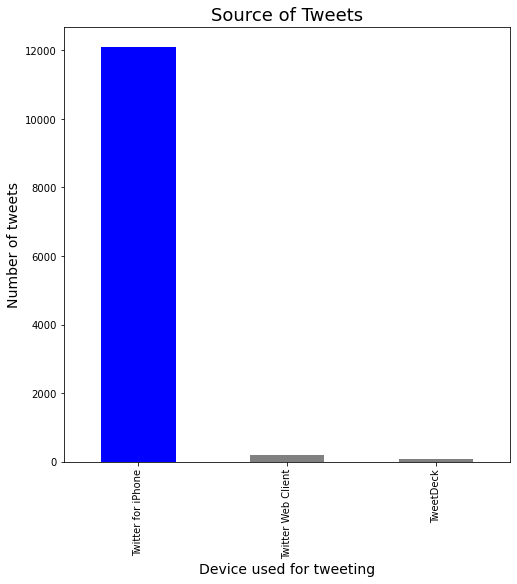

In [130]:
df_twitter_archive_master['source'].value_counts().plot(kind='bar', figsize=(8,8),color=colors,)
plt.title('Source of Tweets', fontsize=18)
plt.xlabel('Device used for tweeting',fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)

#### COMMENT: The Visual above shows that majority of the tweets were from  Iphone

## Q2: Which phone source gave most retweets ?

In [131]:
df_twitter_archive_master.groupby('source')['retweet_count'].mean().sort_values(ascending=False)

source
Twitter for iPhone    2374.681886
Twitter Web Client    1949.700000
TweetDeck             1663.800000
Name: retweet_count, dtype: float64

In [181]:
colors=['Blue', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey']

Text(0.5, 0, 'phone source')

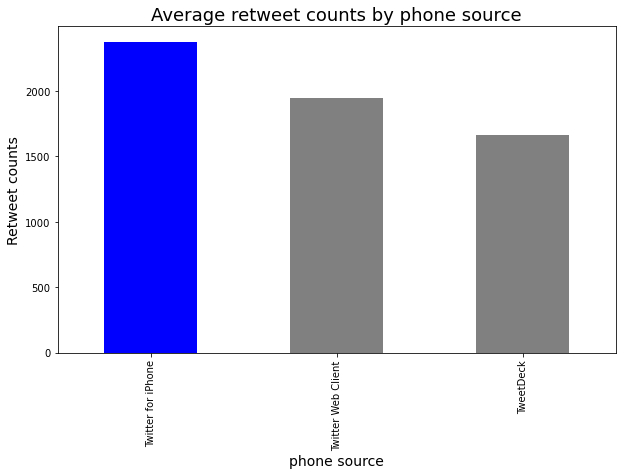

In [132]:
df_twitter_archive_master.groupby('source')['retweet_count'].mean().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Average retweet counts by phone source', fontsize=18)
plt.ylabel('Retweet counts', fontsize=14)
plt.xlabel('phone source', fontsize=14)

#### COMMENT: We can see that the chart shows most retweets count came from twitter web client

### Q3: Which phone source gave most favourite counts?

In [133]:
df_twitter_archive_master.groupby('source')['favorite_count'].mean().sort_values(ascending=False)

source
Twitter for iPhone    7505.605955
Twitter Web Client    4805.233333
TweetDeck             3857.200000
Name: favorite_count, dtype: float64

In [134]:
colors=['Blue', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey']

Text(0.5, 0, 'phone source')

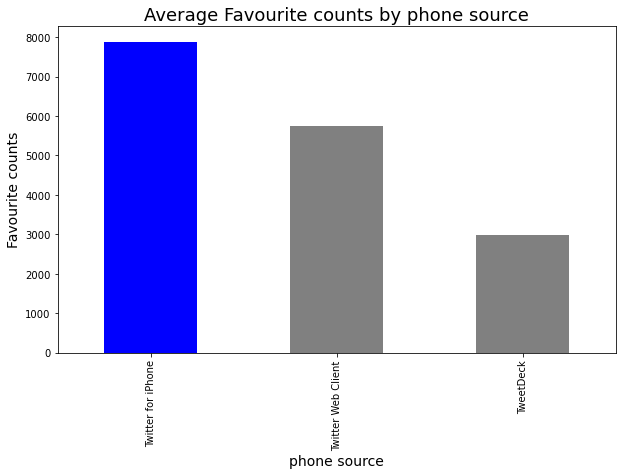

In [187]:
df_twitter_archive_master.groupby('source')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Average Favourite counts by phone source', fontsize=18)
plt.ylabel('Favourite counts', fontsize=14)
plt.xlabel('phone source', fontsize=14)

#### COMMENT: We can see that the chart shows most fovorite count came from twitter for iphone

### Q4: Is there any correlation between retweets and likes?

Text(0, 0.5, 'LIkes')

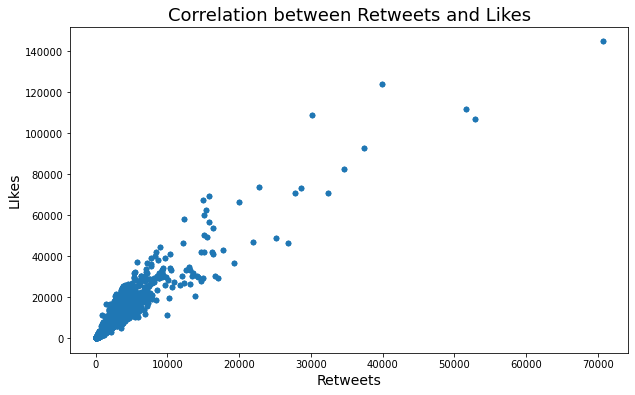

In [190]:
df_twitter_archive_master.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize=(10,6))
plt.title('Correlation between Retweets and Likes', fontsize=18)
plt.xlabel('Retweets', fontsize=14)
plt.ylabel('LIkes', fontsize=14)

#### Comments: there is a positive corroletion between likes and retweets

### Conclusions

Finally, The findings are summarized along with the results that have been performed in relation to the question(s) provided at the beginning of the analysis.

The Visual above shows that majority of the tweets were from  Iphone.

We can see that the chart shows most retweets count came from twitter web client.

We can see that the chart shows most fovorite count came from twitter for iphone

there is a positive corroletion between likes and retweets



### Limitations
Over 1000 of the tweets do not contain Dog stages. This is due for further investigation

Some Dogs do not have names

